## MANISH KUMAR
## D19018

#### Objective:-1. Build a Feed Forward Network for MNIST Classification in Pytorch in not more than 10 epochs.
* Number of parameters used in the model ( lower the better)
* Validation data accuracy (higher the better)
* Experimentation details to reach at the final set of parameters used in the model.

In [1]:
## import neccessaery libraries
import os
from pathlib import Path
import torch
from torch.utils.data import TensorDataset ,DataLoader
from torch import nn,optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
os.chdir("C:\\Users\\MANDY\\Desktop\\dataset")
train=pd.read_csv("MNISTDATASET.csv")
test=pd.read_csv("MNIST_TEST.csv")

In [3]:
# get the shape of loaded datase
x=train.drop("label",axis=1)
y=np.array(train['label'])
x.shape,y.shape

((42000, 784), (42000,))

In [4]:
torch_X_train = torch.from_numpy(x.values).type(torch.FloatTensor)/255
torch_y_train = torch.from_numpy(y).type(torch.LongTensor)
myDataset = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
valid_no  = int(0.2 * len(myDataset))
# so divide the data into trainset and testset
trainSet,testSet = torch.utils.data.random_split(myDataset,(len(myDataset)-valid_no,valid_no))
print(f"len of trainSet {len(trainSet)} , len of testSet {len(testSet)}")
batch_size=64
train_loader  = DataLoader(trainSet , batch_size=batch_size ,shuffle=True) 
test_loader  = DataLoader(testSet , batch_size=batch_size ,shuffle=True)

len of trainSet 33600 , len of testSet 8400


#### EXPERIMENT 1

In [25]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Adagrad optimizer used

In [32]:
from torch import optim
#Adagrad optimizer used
optimizer=optim.Adagrad(model.parameters(),lr=0.1)

In [33]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..  Training Loss: 0.430..  Test Loss: 0.238..  Test Accuracy: 0.940
Epoch: 2/5..  Training Loss: 0.151..  Test Loss: 0.210..  Test Accuracy: 0.945
Epoch: 3/5..  Training Loss: 0.122..  Test Loss: 0.197..  Test Accuracy: 0.949
Epoch: 4/5..  Training Loss: 0.105..  Test Loss: 0.199..  Test Accuracy: 0.951
Epoch: 5/5..  Training Loss: 0.091..  Test Loss: 0.198..  Test Accuracy: 0.952


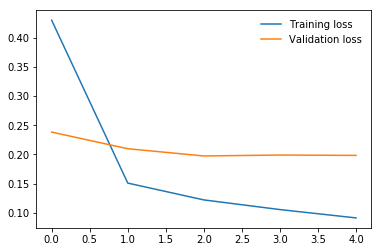

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 2

In [66]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [67]:
from torch import optim
#Adagrad optimizer used
optimizer=optim.Adagrad(model.parameters(),lr=0.2)

In [68]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 5.779..  Test Loss: 0.340..  Test Accuracy: 0.907
Epoch: 2/10..  Training Loss: 0.285..  Test Loss: 0.311..  Test Accuracy: 0.914
Epoch: 3/10..  Training Loss: 0.215..  Test Loss: 0.218..  Test Accuracy: 0.937
Epoch: 4/10..  Training Loss: 0.176..  Test Loss: 0.230..  Test Accuracy: 0.934
Epoch: 5/10..  Training Loss: 0.150..  Test Loss: 0.204..  Test Accuracy: 0.945
Epoch: 6/10..  Training Loss: 0.133..  Test Loss: 0.216..  Test Accuracy: 0.942
Epoch: 7/10..  Training Loss: 0.119..  Test Loss: 0.215..  Test Accuracy: 0.942
Epoch: 8/10..  Training Loss: 0.105..  Test Loss: 0.219..  Test Accuracy: 0.941
Epoch: 9/10..  Training Loss: 0.098..  Test Loss: 0.206..  Test Accuracy: 0.946
Epoch: 10/10..  Training Loss: 0.088..  Test Loss: 0.202..  Test Accuracy: 0.949


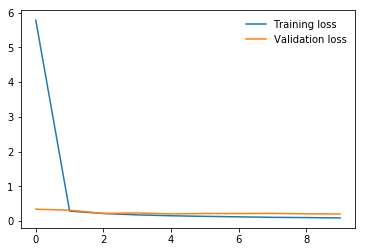

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 3

In [36]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### SGD optimizer used

In [59]:
from torch import optim
#SGD optimizer used
optimizer=optim.SGD(model.parameters(),lr=0.1,momentum=0.9)

### epochs =5

In [60]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..  Training Loss: 2.306..  Test Loss: 2.305..  Test Accuracy: 0.104
Epoch: 2/5..  Training Loss: 2.304..  Test Loss: 2.303..  Test Accuracy: 0.113
Epoch: 3/5..  Training Loss: 2.305..  Test Loss: 2.305..  Test Accuracy: 0.097
Epoch: 4/5..  Training Loss: 2.305..  Test Loss: 2.302..  Test Accuracy: 0.114
Epoch: 5/5..  Training Loss: 2.305..  Test Loss: 2.308..  Test Accuracy: 0.103


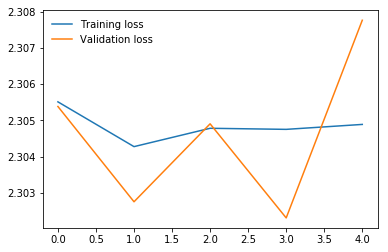

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 4

In [62]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [63]:
from torch import optim
#SGD optimizer used
optimizer=optim.SGD(model.parameters(),lr=0.1,momentum=0.9)

### epochs = 10

In [64]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 0.347..  Test Loss: 0.175..  Test Accuracy: 0.946
Epoch: 2/10..  Training Loss: 0.133..  Test Loss: 0.125..  Test Accuracy: 0.961
Epoch: 3/10..  Training Loss: 0.087..  Test Loss: 0.114..  Test Accuracy: 0.967
Epoch: 4/10..  Training Loss: 0.064..  Test Loss: 0.105..  Test Accuracy: 0.971
Epoch: 5/10..  Training Loss: 0.050..  Test Loss: 0.114..  Test Accuracy: 0.970
Epoch: 6/10..  Training Loss: 0.038..  Test Loss: 0.119..  Test Accuracy: 0.971
Epoch: 7/10..  Training Loss: 0.039..  Test Loss: 0.138..  Test Accuracy: 0.965
Epoch: 8/10..  Training Loss: 0.030..  Test Loss: 0.159..  Test Accuracy: 0.964
Epoch: 9/10..  Training Loss: 0.024..  Test Loss: 0.149..  Test Accuracy: 0.970
Epoch: 10/10..  Training Loss: 0.026..  Test Loss: 0.120..  Test Accuracy: 0.975


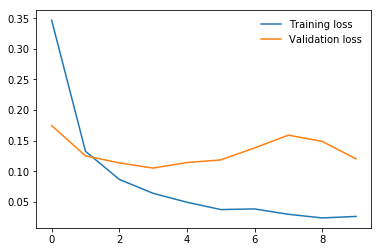

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 5

In [48]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Adam optimizer used

In [56]:
from torch import optim
#Adam optimizer used
optimizer=optim.Adam(model.parameters(),lr=0.5)

In [57]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..  Training Loss: 2.345..  Test Loss: 2.357..  Test Accuracy: 0.100
Epoch: 2/5..  Training Loss: 2.343..  Test Loss: 2.340..  Test Accuracy: 0.091
Epoch: 3/5..  Training Loss: 2.342..  Test Loss: 2.367..  Test Accuracy: 0.105
Epoch: 4/5..  Training Loss: 2.345..  Test Loss: 2.363..  Test Accuracy: 0.097
Epoch: 5/5..  Training Loss: 2.342..  Test Loss: 2.326..  Test Accuracy: 0.097


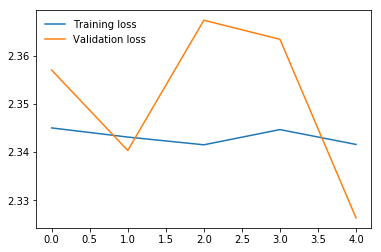

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 6

In [70]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [71]:
from torch import optim
#Adam optimizer used
optimizer=optim.Adam(model.parameters(),lr=0.10,eps=1e-8)

In [72]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 2.459..  Test Loss: 1.541..  Test Accuracy: 0.384
Epoch: 2/10..  Training Loss: 1.494..  Test Loss: 1.422..  Test Accuracy: 0.380
Epoch: 3/10..  Training Loss: 1.620..  Test Loss: 1.743..  Test Accuracy: 0.271
Epoch: 4/10..  Training Loss: 1.762..  Test Loss: 1.860..  Test Accuracy: 0.190
Epoch: 5/10..  Training Loss: 1.860..  Test Loss: 1.835..  Test Accuracy: 0.211
Epoch: 6/10..  Training Loss: 1.887..  Test Loss: 1.858..  Test Accuracy: 0.190
Epoch: 7/10..  Training Loss: 1.893..  Test Loss: 1.859..  Test Accuracy: 0.196
Epoch: 8/10..  Training Loss: 1.897..  Test Loss: 1.881..  Test Accuracy: 0.192
Epoch: 9/10..  Training Loss: 1.890..  Test Loss: 1.853..  Test Accuracy: 0.214
Epoch: 10/10..  Training Loss: 1.876..  Test Loss: 1.863..  Test Accuracy: 0.206


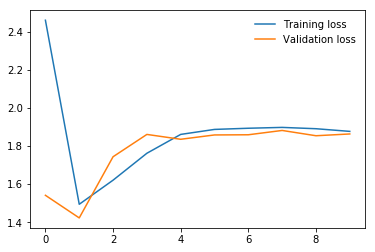

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

## experiment 7

In [74]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [84]:
from torch import optim
#RMSprop optimizer used
optimizer=optim.RMSprop(model.parameters(),lr=0.10,
    alpha=0.99,
    eps=1e-08,
    weight_decay=1,
    momentum=1,
    centered=False,)

In [85]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.092
Epoch: 2/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.092
Epoch: 3/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.092
Epoch: 4/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.091
Epoch: 5/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.091
Epoch: 6/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.092
Epoch: 7/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.092
Epoch: 8/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.092
Epoch: 9/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.092
Epoch: 10/10..  Training Loss: nan..  Test Loss: nan..  Test Accuracy: 0.091


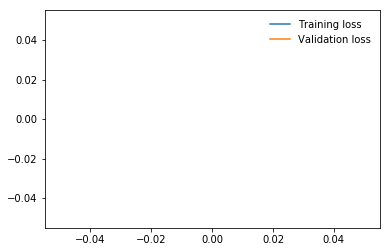

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()